# Analisando dados de produção hospitalar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
dados = pd.read_csv('dados/sih_cnv_qiuf074447104_28_63_99.csv',
                    engine = 'python', encoding = 'ISO-8859-1', skiprows = 3,
                    sep = ';', skipfooter = 12, thousands = '.', decimal = ',')

In [4]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,10516070.26,1394262146.50
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,-,587778407.94
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,15065867.12,2613559191.21
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,2164371.02,451170144.15
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,43689467.84,6322687933.44


In [5]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,112385822.04,113809028.30,116985178.63,120027121.08,116546657.80,122325557.64,114892531.95,114464874.02,120732038.67,16750147966.65
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26973943.11,26354221.47,26569066.08,27768462.56,28200723.03,26783833.64,27456434.20,26922668.28,23959476.62,3219624366.70
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,23431985.13,24728541.29,24130933.81,22608901.38,23329871.28,22552033.63,22790096.76,19782985.94,21462469.97,2988456549.66
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,50235627.95,44674462.22,53622374.91,51008354.28,49885683.22,50434366.44,47764974.85,50332961.30,47555420.60,6682627768.18
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,27495227.73,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,3543027009.96


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to Total
dtypes: float64(192), object(3)
memory usage: 41.3+ KB


In [7]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,...,60084730.16,63627768.07,64215212.70,66194067.52,67774073.77,65189094.24,66941705.27,65725826.24,65537138.18,8578342381.93
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,...,75312992.60,78484636.42,82195281.71,82154881.51,85830238.53,81383302.40,83366058.95,80849274.07,82539178.65,11331225220.51
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4087811.85,4435042.77,3497928.26,4040988.99,3503666.51,1679849.33,2443674.72,2868626.39,2077360.03,434057663.03
25%,4740724.30,7060731.59,8041439.31,8526744.11,8531522.65,9272741.85,9266086.50,9297840.75,9207727.12,9083121.19,...,17869381.75,20050484.23,20649156.58,21552457.00,21789500.43,19273823.80,20459676.99,19420476.30,17692257.89,2765440692.40
50%,7985142.43,10079928.25,10352238.59,11253833.56,12215107.11,12850125.67,12755413.77,12872578.37,12727433.30,12768727.85,...,27771530.46,27824136.43,32825468.35,30188993.41,32464805.34,31610313.47,30213039.18,31094801.87,35767071.98,3639512926.05
75%,17684828.78,25693265.33,29357964.23,32741327.52,31376220.41,31755745.04,31805516.06,33353946.49,32015490.68,31268675.55,...,78895204.37,84154584.67,85624377.95,85581666.72,91949857.33,86015034.65,91164992.54,88692072.66,88753205.98,11166137976.18
max,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,354688774.53,365736576.06,388449616.64,385860970.99,404744754.97,379261589.32,387813091.33,372695381.22,383374712.92,54440311252.50


In [8]:
dados[['Unidade da Federação', '2023/Dez']]

,Unidade da Federação,2023/Dez
0,11 Rondônia,9603361.10
1,12 Acre,3503827.09
2,13 Amazonas,14265257.60
3,14 Roraima,2077360.03
4,15 Pará,54223823.56
5,16 Amapá,4021077.83
6,17 Tocantins,10074562.93
7,21 Maranhão,40847676.30
8,22 Piauí,21650742.95
9,23 Ceará,63542964.03


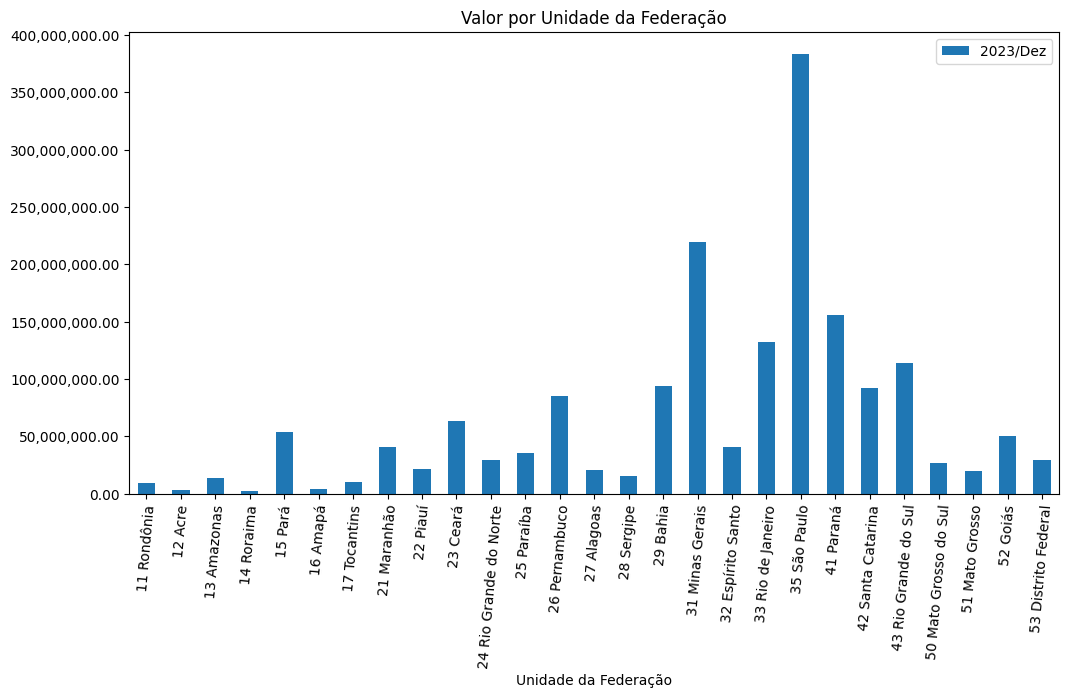

In [9]:
ax = dados.plot(x = 'Unidade da Federação', y = '2023/Dez', kind = 'bar',
                  figsize = (12, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valor por Unidade da Federação')
plt.xticks(rotation = 85)
plt.show()

In [10]:
dados.columns

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out',
       '2023/Nov', '2023/Dez', '2024/Jan', 'Total'],
      dtype='object', length=195)

In [11]:
dados.mean(numeric_only = True)

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Set     65189094.24
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
Total      8578342381.93
Length: 192, dtype: float64

In [12]:
# Lista da colunas onde foi calculada a média, garantindo que não há
# "missing values"

colunas_analise = dados.mean(numeric_only = True).index.to_list()
colunas_analise.insert(0, 'Unidade da Federação')
colunas_analise[:5]

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr']

In [13]:
dados_analise = dados[colunas_analise]
dados_analise.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,10475614.21,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,1394262146.50
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4701182.54,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,587778407.94
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19551460.68,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,2613559191.21
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,4456289.66,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,451170144.15
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,47860117.17,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,6322687933.44


In [14]:
dados_analise = dados_analise.set_index('Unidade da Federação')
dados_analise.drop('Total', axis = 1, inplace = True)
dados_analise.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,11221375.96,10475614.21,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4927482.49,4701182.54,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,21640609.70,19551460.68,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4597297.19,4456289.66,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,47376878.70,47860117.17,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56


In [15]:
dados_analise['2008/Jan'].head()

Unidade da Federação
11 Rondônia    1388528.39
12 Acre         902416.00
13 Amazonas    4735529.42
14 Roraima      657889.53
15 Pará       18864744.11
Name: 2008/Jan, dtype: float64

In [16]:
dados_analise.loc['14 Roraima']

2008/Jan    657889.53
2008/Fev    777939.31
2008/Mar    718688.03
2008/Abr    839994.39
2008/Mai    862347.96
              ...    
2023/Ago   4766375.31
2023/Set   1679849.33
2023/Out   2443674.72
2023/Nov   2868626.39
2023/Dez   2077360.03
Name: 14 Roraima, Length: 191, dtype: float64

In [17]:
dados_analise.iloc[3]

2008/Jan    657889.53
2008/Fev    777939.31
2008/Mar    718688.03
2008/Abr    839994.39
2008/Mai    862347.96
              ...    
2023/Ago   4766375.31
2023/Set   1679849.33
2023/Out   2443674.72
2023/Nov   2868626.39
2023/Dez   2077360.03
Name: 14 Roraima, Length: 191, dtype: float64

In [18]:
dados_analise.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.90,...,5456723.98,23025258.52,91678473.48,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,9102212.86,28394310.93,148677526.82,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,...,10249595.97,44567062.94,156087269.23,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,11253833.56,44054604.82,161227125.43,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99
2008/Mai,1645953.84,1819443.92,7831399.90,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,10198619.17,44911021.15,187119397.64,54419620.71,26845308.18,48397733.07,9770421.80,9231645.40,21615970.67,12891719.72


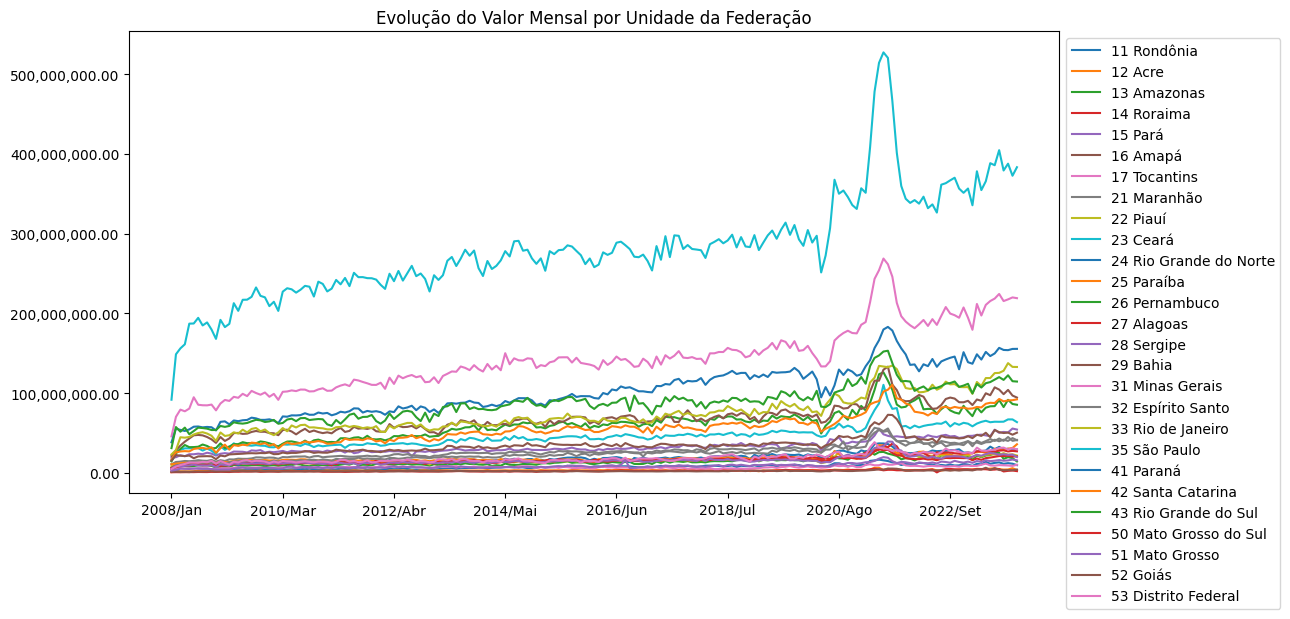

In [19]:
ax = dados_analise.T.plot(figsize = (12, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Evolução do Valor Mensal por Unidade da Federação')

plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

plt.show()

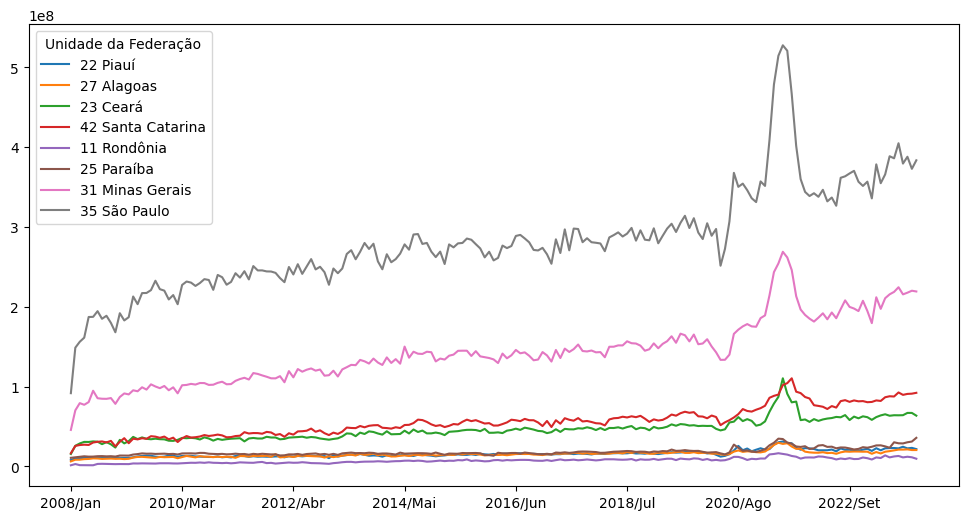

In [20]:
df_aleatorio = dados_analise.sample(n = 7, random_state = 42)
df_meu_estado = dados_analise.loc[['35 São Paulo']]

ax = pd.concat([df_aleatorio, df_meu_estado]).T.plot(figsize = (12, 6))

plt.show()

In [21]:
dados_analise['Total'] = dados_analise.sum(axis = 1)
dados_analise.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,10475614.21,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,1380141068.81
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4701182.54,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,587778407.94
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,19551460.68,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,2588762689.93
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4456289.66,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,447304161.88
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,47860117.17,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,6251030496.38


In [22]:
dados_analise.sort_values('Total', ascending = False).head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,354688774.53,365736576.06,388449616.64,385860970.99,404744754.97,379261589.32,387813091.33,372695381.22,383374712.92,53833205191.94
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,197315604.50,210658033.28,215485821.01,218556887.17,224381711.12,215446762.43,217558259.58,220020779.18,219072249.00,27269931158.89
41 Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,...,142068797.99,151663502.33,146418150.35,149752328.89,156740980.71,154105596.28,153865501.60,155397487.31,155479759.04,19542266786.86
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,106960121.59,112385822.04,113809028.30,116985178.63,120027121.08,116546657.80,122325557.64,114892531.95,114464874.02,16562990918.62
33 Rio de Janeiro,23025258.52,28394310.93,44567062.94,44054604.82,44911021.15,48056212.24,49872379.35,50912706.60,49270352.76,46434912.38,...,108881458.89,118845758.02,118887816.16,125082533.64,125349945.68,128005946.11,137582602.71,132854225.18,132738171.12,14146973389.79


In [23]:
dados_analise.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [24]:
regioes = 7 * ['Norte']
regioes += 9 * ['Nordeste']
regioes += 4 * ['Sudeste']
regioes += 3 * ['Sul']
regioes += 4 * ['Centro Oeste']
print(regioes)

['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste']


In [25]:
dados_analise['Região'] = regioes
dados_analise

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,1380141068.81,Norte
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,587778407.94,Norte
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,2588762689.93,Norte
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,447304161.88,Norte
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,6251030496.38,Norte
16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,1866748.58,...,6327228.14,3497928.26,5812495.72,3503666.51,3218091.37,3361503.59,3159644.32,4021077.83,428062298.08,Norte
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,...,11471603.73,9213748.90,8917570.89,9627055.69,9418896.52,9147983.05,8618788.45,10074562.93,1357229019.88,Norte
21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,16072219.28,...,38311853.68,38558293.30,41480724.43,39498590.66,41557159.98,39984105.23,43488419.23,40847676.30,5188387451.38,Nordeste
22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,11715943.38,...,22614251.89,22927380.71,23012661.22,22561338.38,24604607.40,22561682.28,23197106.71,21650742.95,3022716672.55,Nordeste


In [26]:
dados_analise.drop('Total', axis = 1, inplace = True)

In [27]:
dados_sudeste = dados_analise[dados_analise['Região'] == 'Sudeste'].copy()
dados_sudeste.drop('Região', axis = 1, inplace = True)

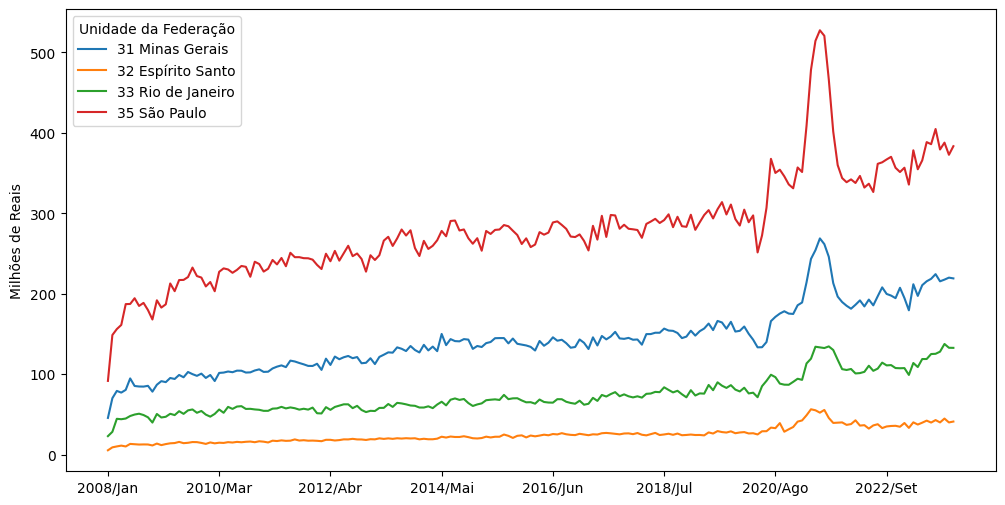

In [28]:
dados_sudeste = dados_sudeste / 1_000_000

ax = dados_sudeste.T.plot(figsize = (12, 6))
ax.set_ylabel('Milhões de Reais')

plt.show()

In [29]:
def grafico_gastos_ultimos_5_anos(dados):

    # Últimos 60 meses, 5 primeiros estados
    dados = dados[dados.columns[-61:]].head(5).T

    # Tamanho do gráfico
    ax = dados.plot(figsize = (12, 6))

    # Marcador do eixo x a cada ano
    ax.set_xticks(range(0, 61, 12), dados.index.to_list()[::12])

    # Títulos dos eixos
    ax.set_xlabel('Mês')
    ax.set_ylabel('Milhões de Reais')

    # Linha de grade
    ax.grid(linestyle='--')

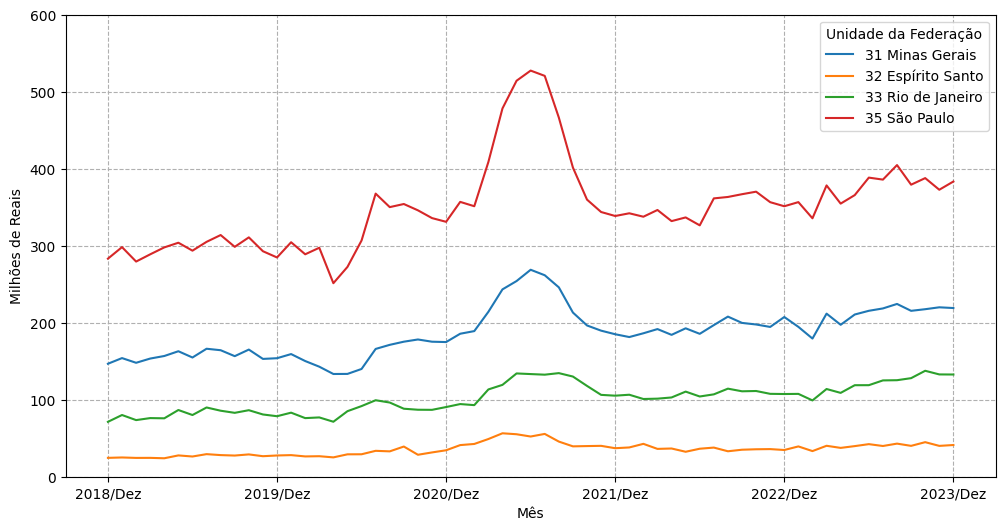

In [30]:
grafico_gastos_ultimos_5_anos(dados_sudeste)
_ = plt.ylim(0, 600)